<a href="https://colab.research.google.com/github/vinceriot/ML_lab/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%93%D0%BE%D0%BB%D0%B4%D0%BE%D0%B1%D0%B8%D0%BD_%D0%94%D0%B5%D0%BD%D0%B8%D1%81_%D0%A4%D0%98%D0%A2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
pip install ucimlrepo

In [6]:
# Загрузка датасета
dataset = pd.read_csv('/content/drive/MyDrive/datapy/data.csv', delimiter=';')
# Информация о датасете
print(dataset.head())
print(dataset.describe())
print(dataset.describe(include=['O']))
print(dataset.info())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [7]:
# Проверка пропусков
print(dataset.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# Оценки в первом семестре как целевая переменная
y = dataset['Curricular units 1st sem (grade)']

# Удаляем целевую переменную и Target из признаков
X = dataset.drop(['Curricular units 1st sem (grade)', 'Target'], axis=1)

# Кодируем категориальные переменные
categorical_columns = ['Marital status', 'Nacionality', 'Gender', 'Daytime/evening attendance\t']
encoder = OrdinalEncoder()
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [9]:
# Преобразуем обратно в DataFrame, чтобы сохранить имена столбцов
X = pd.DataFrame(X_scaled, columns=X.columns)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


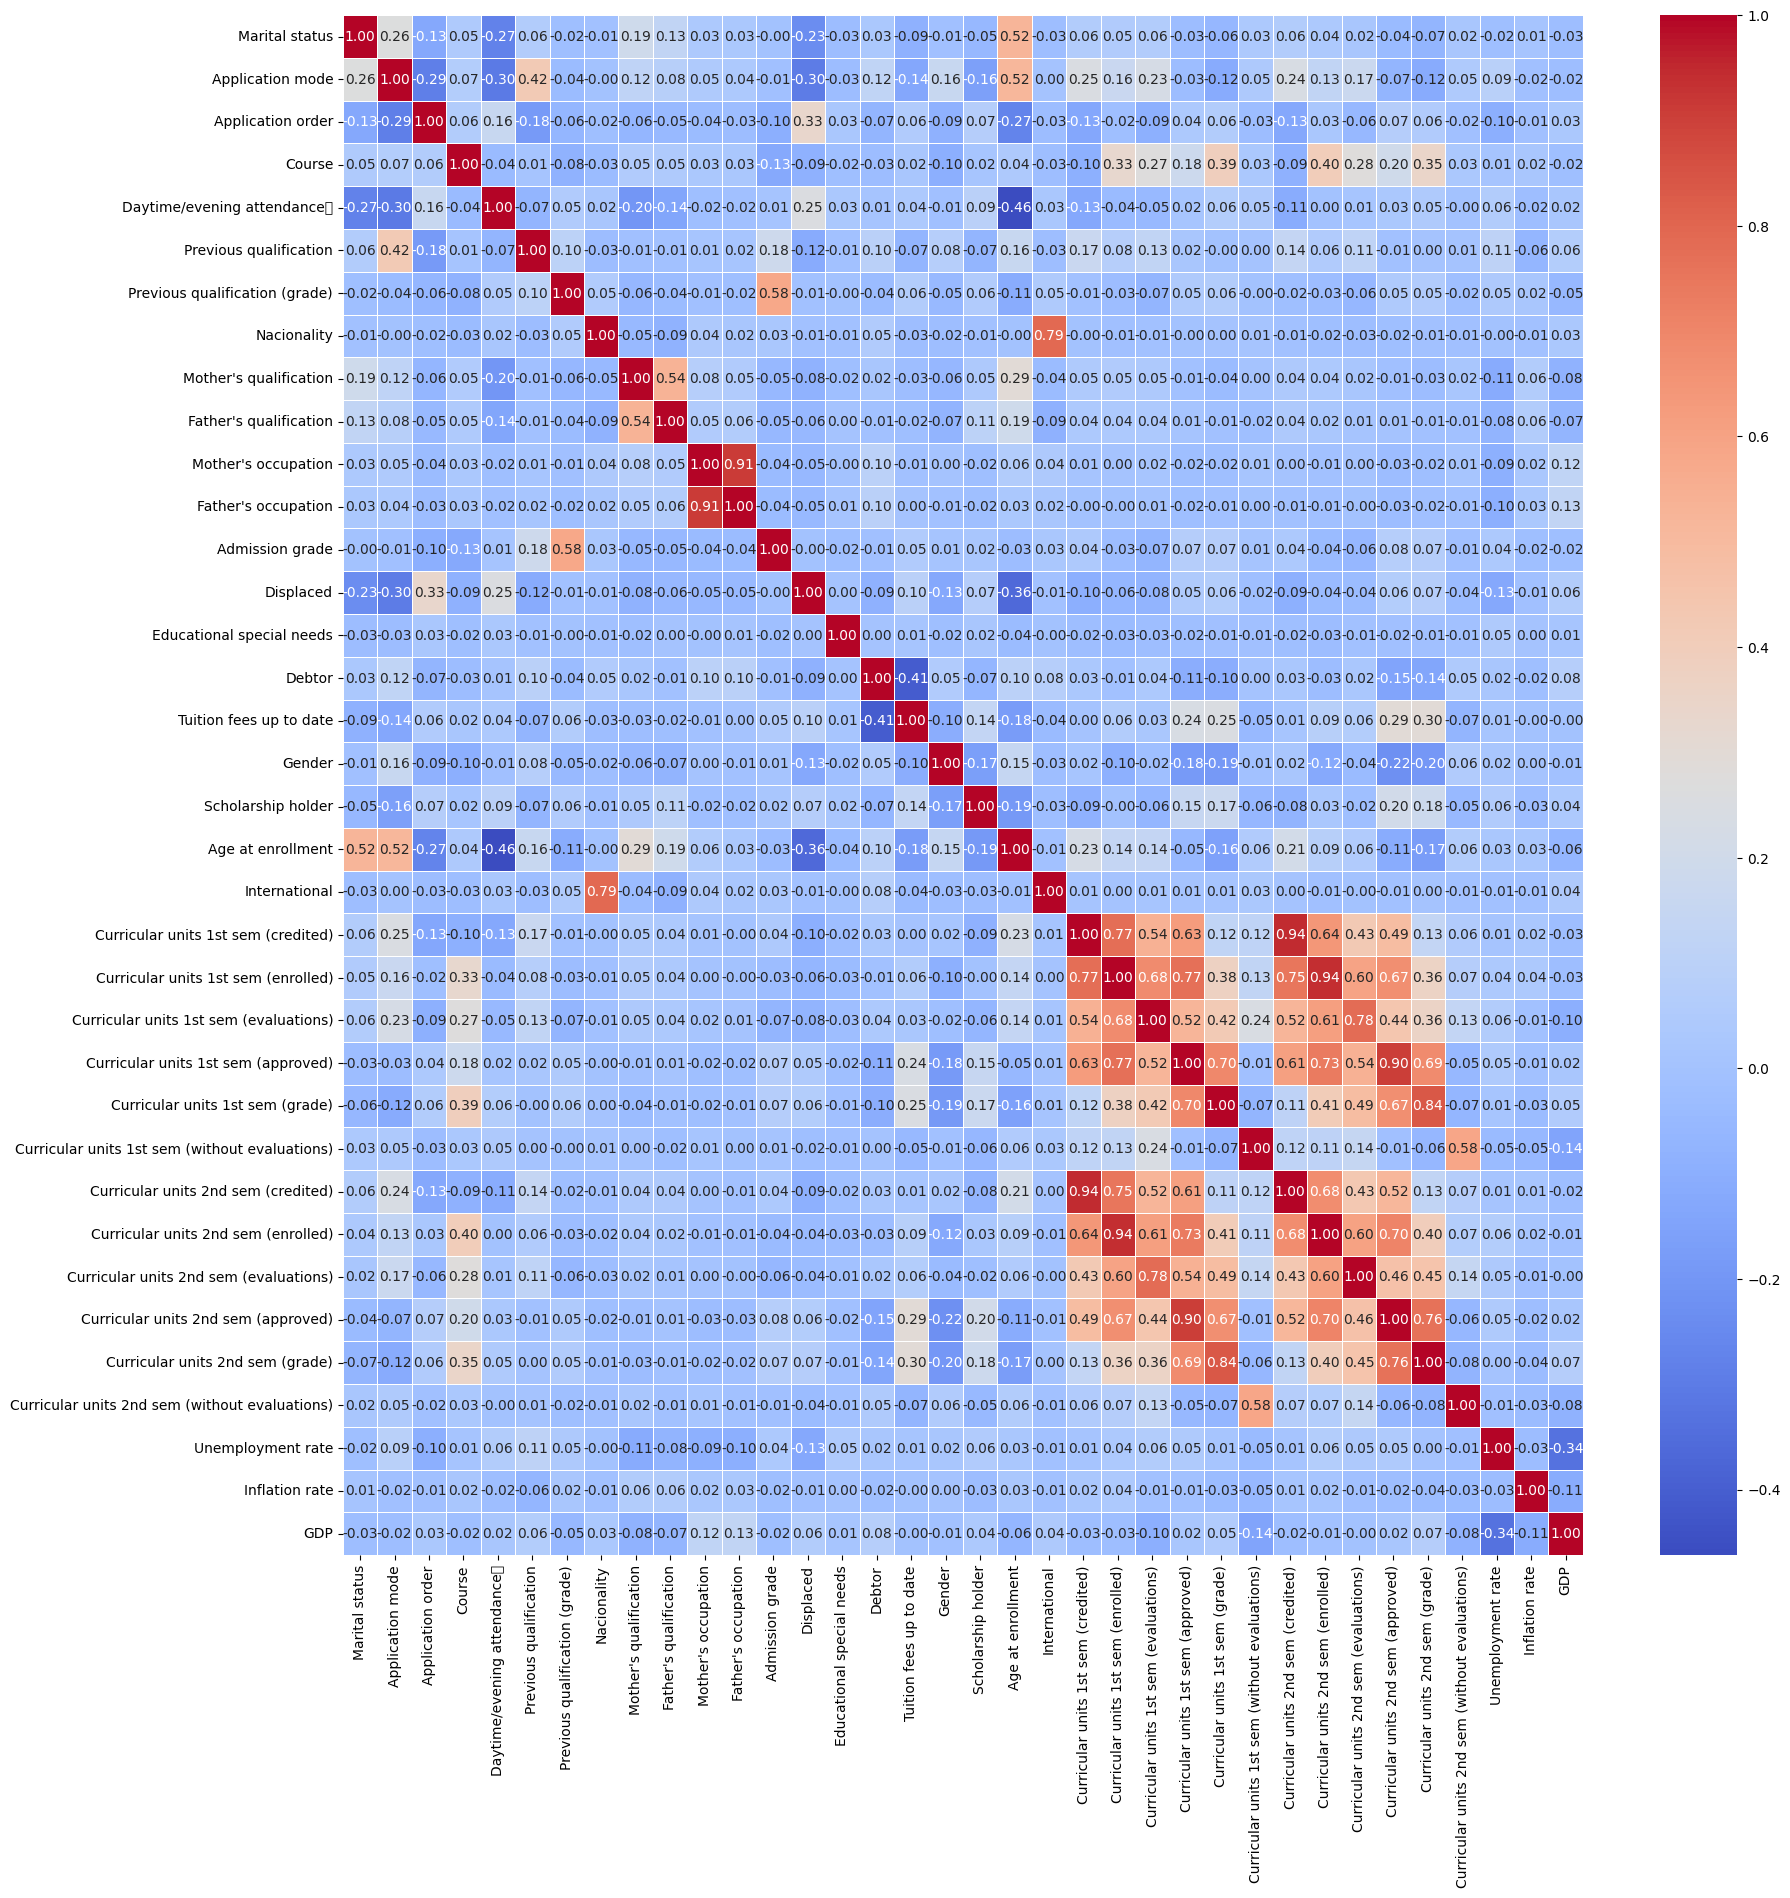

In [10]:
# Построение матрицы корреляции
corr = dataset.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#Линейная регрессия

In [11]:
# Линейная регрессия
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

# Предсказания
y_pred = modelLR.predict(X_test)

In [12]:
# Функция для вывода метрик
def Reg_Models_Evaluation_Metrics(model, X_train, y_train, X_test, y_test, y_pred):
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)

    # Adjusted R-squared
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\nR2: {round(R2,4)}\nAdjusted R2: {round(adjusted_r2, 4)}\nCross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

# Выводим метрики модели
Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pred)



RMSE:  2.184
R2: 0.7954
Adjusted R2: 0.787
Cross Validated R2: 0.804


(0.7953959838035644,
 0.7869611892607196,
 0.8040306602440099,
 2.1839961254322375)

# Полиноминальная регрессия

RMSE:  21.9109
R2: -19.2501
Adjusted R2: 4.7805
Cross Validated R2: -16.6832


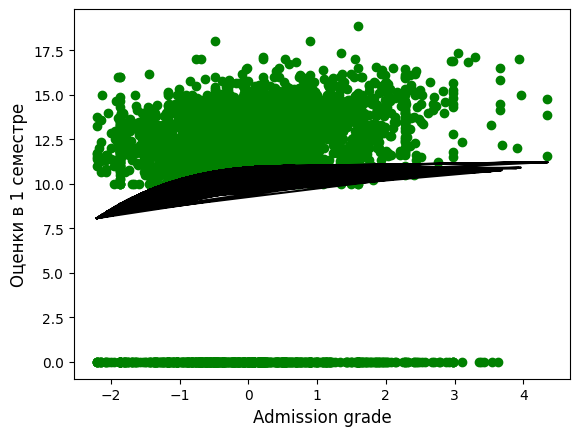

In [13]:
# Полиномиальная регрессия
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Применяем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)

# Разделение данных
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

# Создаем и обучаем модель полиномиальной регрессии
modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)

# Предсказание и оценка модели
y_pr_PR = modelPR.predict(X_p_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

# Пример визуализации полиномиальной регрессии для одного признака
X2 = X['Admission grade'].values[:, np.newaxis]
y2 = y.values

poly_features_single = poly.fit_transform(X2)

model_single = LinearRegression()
model_single.fit(poly_features_single, y2)

plt.scatter(X2, y2, color='g')
plt.plot(X2, model_single.predict(poly.fit_transform(X2)), color='k')
plt.ylabel('Оценки в 1 семестре', size=12)
plt.xlabel('Admission grade', size=12)
plt.show()

# Регрессия дерева принятия решений

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Создаем модель дерева решений
modelDT = DecisionTreeRegressor()

# Обучаем модель
modelDT.fit(X_train, y_train)

# Предсказание и оценка модели
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  1.2094
R2: 0.9373
Adjusted R2: 0.9347
Cross Validated R2: 0.9399


#Регрессия случайного леса

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применяем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Создаем модель случайного леса
modelRF = RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

# Обучаем модель
modelRF.fit(X_train_poly, y_train)

# Предсказание и оценка модели
y_rf_pred = modelRF.predict(X_test_poly)
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train_poly, y_train, X_test_poly, y_test, y_rf_pred)

RMSE:  0.9037
R2: 0.9649
Adjusted R2: 0.8576
Cross Validated R2: 0.9707


# SVR

In [16]:
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

# Регрессия на основе Support Vector Machine (SVM) с различными ядрами

# Линейное ядро
modelSVR_linear = SVR(kernel='linear')
modelSVR_linear.fit(X_train, y_train)
y_svr_linear_pred = modelSVR_linear.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR_linear, X_train, y_train, X_test, y_test, y_svr_linear_pred)


RMSE:  2.6508
R2: 0.6979
Adjusted R2: 0.6855
Cross Validated R2: 0.6992


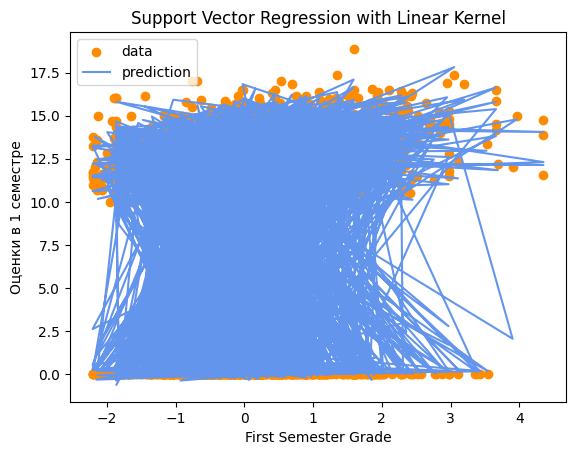

In [17]:
# Проверьте, что имя столбца совпадает с тем, которое у вас есть в датасете
plt.scatter(X_train["Admission grade"], y_train, color='darkorange', label='data')
plt.plot(X_train["Admission grade"], modelSVR_linear.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.title('Support Vector Regression with Linear Kernel')
plt.xlabel('First Semester Grade')  # Подпись по оси X
plt.ylabel('Оценки в 1 семестре')   # Подпись по оси Y
plt.show()


In [18]:
# Полиномиальное ядро
modelSVR_poly = SVR(kernel='poly')
modelSVR_poly.fit(X_train, y_train)
y_svr_poly_pred = modelSVR_poly.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR_poly, X_train, y_train, X_test, y_test, y_svr_poly_pred)


RMSE:  2.7181
R2: 0.6824
Adjusted R2: 0.6693
Cross Validated R2: 0.713


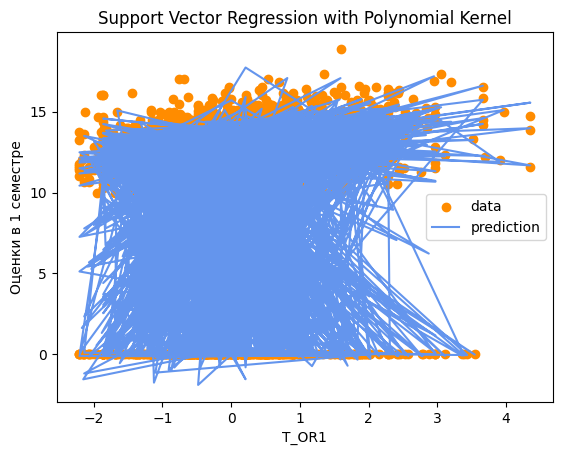

In [19]:

plt.scatter(X_train["Admission grade"], y_train, color='darkorange', label='data')
plt.plot(X_train["Admission grade"], modelSVR_poly.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.title('Support Vector Regression with Polynomial Kernel')
plt.xlabel('T_OR1')
plt.ylabel('Оценки в 1 семестре')
plt.show()

In [20]:
# Радиальная базисная функция (RBF) ядро
modelSVR_rbf = SVR(kernel='rbf')
modelSVR_rbf.fit(X_train, y_train)
y_svr_rbf_pred = modelSVR_rbf.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR_rbf, X_train, y_train, X_test, y_test, y_svr_rbf_pred)



RMSE:  2.3823
R2: 0.756
Adjusted R2: 0.746
Cross Validated R2: 0.7524


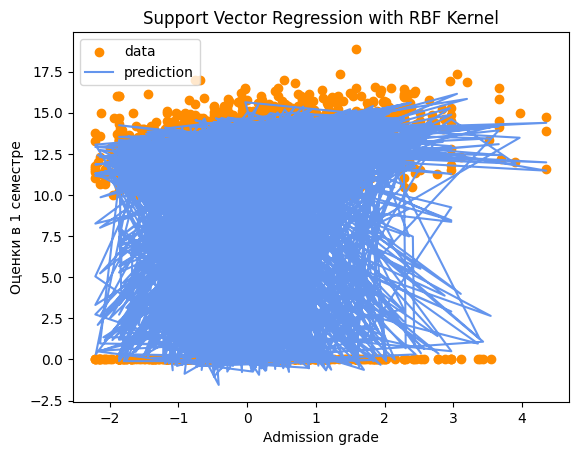

In [22]:
plt.scatter(X_train["Admission grade"], y_train, color='darkorange', label='data')
plt.plot(X_train["Admission grade"], modelSVR_rbf.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.title('Support Vector Regression with RBF Kernel')
plt.xlabel('Admission grade')
plt.ylabel('Оценки в 1 семестре')
plt.show()

# Регрессия ElasticNet

In [23]:
# Регрессия Elastic Net
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)



RMSE:  2.2833
R2: 0.7759
Adjusted R2: 0.7666
Cross Validated R2: 0.7843


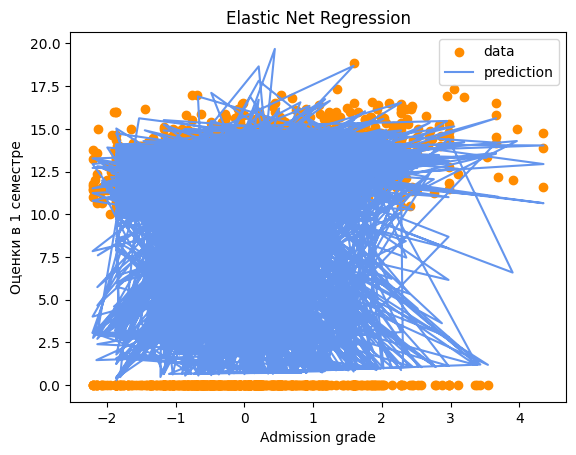

In [24]:
plt.scatter(X_train["Admission grade"], y_train, color='darkorange', label='data')
plt.plot(X_train["Admission grade"], modelEN.predict(X_train), color='cornflowerblue', label='prediction')
plt.legend()
plt.title('Elastic Net Regression')
plt.xlabel('Admission grade')
plt.ylabel('Оценки в 1 семестре')
plt.show()

# Выводы
Регрессия случайного леса показала наилучший R^2 среди всех моделей